Libraries installation

In [18]:
# !pip install numpy
# !pip install matplotlib
# !pip install pandas
# !pip install seaborn
# !pip install scikit-learn
# !pip install umap-learn
# !pip install umap-learn[plot]

libraries import

In [19]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from mpl_toolkits.mplot3d import Axes3D
import umap
import umap.plot

from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Connectiong dataset

In [20]:
input_file = "/content/drive/MyDrive/hepatitis.data"
d = pd.read_csv(input_file, header=None)

In [21]:
d.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


Removing broken cells

In [22]:
d = d.apply(pd.to_numeric, errors='coerce')
d = d.fillna(0)
y = d.iloc[:,0]

In [23]:
d.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,0.0,1
1,2,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,0.0,1
2,2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,0.0,1
3,2,31,1,0.0,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,0.0,200.0,4.0,0.0,1


Computing dimensions using t-sne

[Text(0.5, 1.0, 'RobustScaler')]

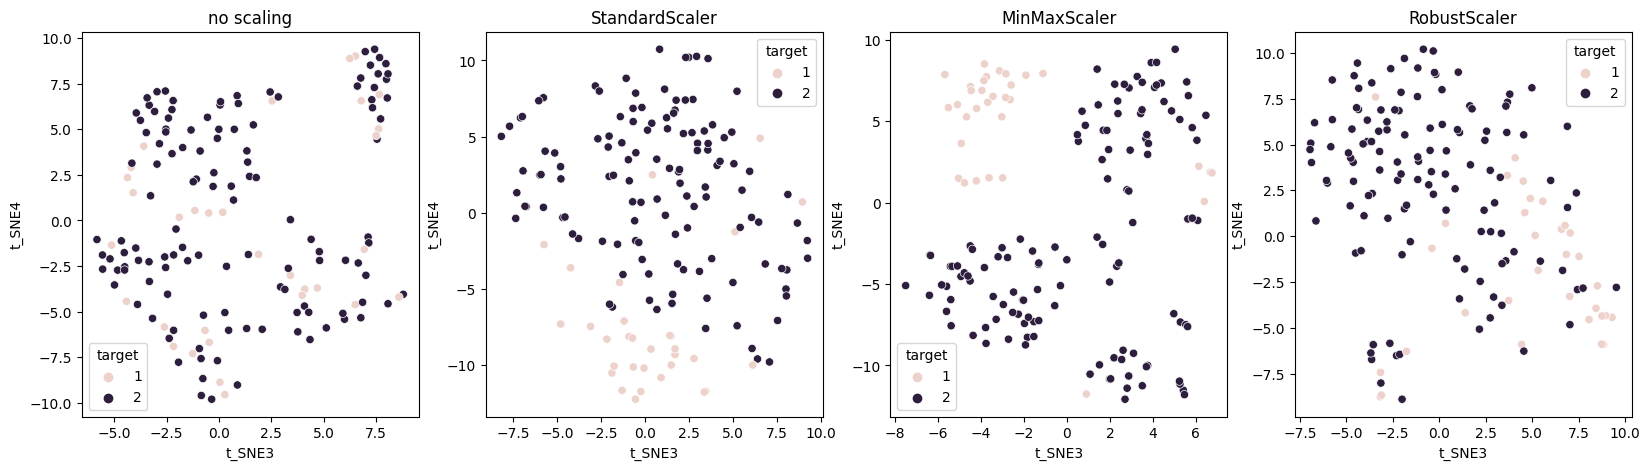

In [24]:
d1 = StandardScaler().fit_transform(d)
d2 = MinMaxScaler().fit_transform(d)
d3 = RobustScaler().fit_transform(d)

t_SNE1 = pd.DataFrame(TSNE(n_components=2, random_state=0).fit_transform(d), columns = ['t_SNE3', 't_SNE4'])

t_SNE2 = pd.DataFrame(TSNE(n_components=2, random_state=0).fit_transform(d1), columns = ['t_SNE3', 't_SNE4'])

t_SNE3 = pd.DataFrame(TSNE(n_components=2, random_state=0).fit_transform(d2), columns = ['t_SNE3', 't_SNE4'])

t_SNE4 = pd.DataFrame(TSNE(n_components=2, random_state=0).fit_transform(d3), columns = ['t_SNE3', 't_SNE4'])

t_SNE1['target'] = y
t_SNE2['target'] = y
t_SNE3['target'] = y
t_SNE4['target'] = y

fig, axs = plt.subplots(ncols=4,figsize=(20,5))

sns.scatterplot(x='t_SNE3', y='t_SNE4', data=t_SNE1, hue='target', ax=axs[0]).set(title='no scaling')
sns.scatterplot(x='t_SNE3', y='t_SNE4', data=t_SNE2, hue='target', ax=axs[1]).set(title='StandardScaler')
sns.scatterplot(x='t_SNE3', y='t_SNE4', data=t_SNE3, hue='target', ax=axs[2]).set(title='MinMaxScaler')
sns.scatterplot(x='t_SNE3', y='t_SNE4', data=t_SNE4, hue='target', ax=axs[3]).set(title='RobustScaler')

Computing with umap

Text(0.5, 1.0, 'RobustScaler')

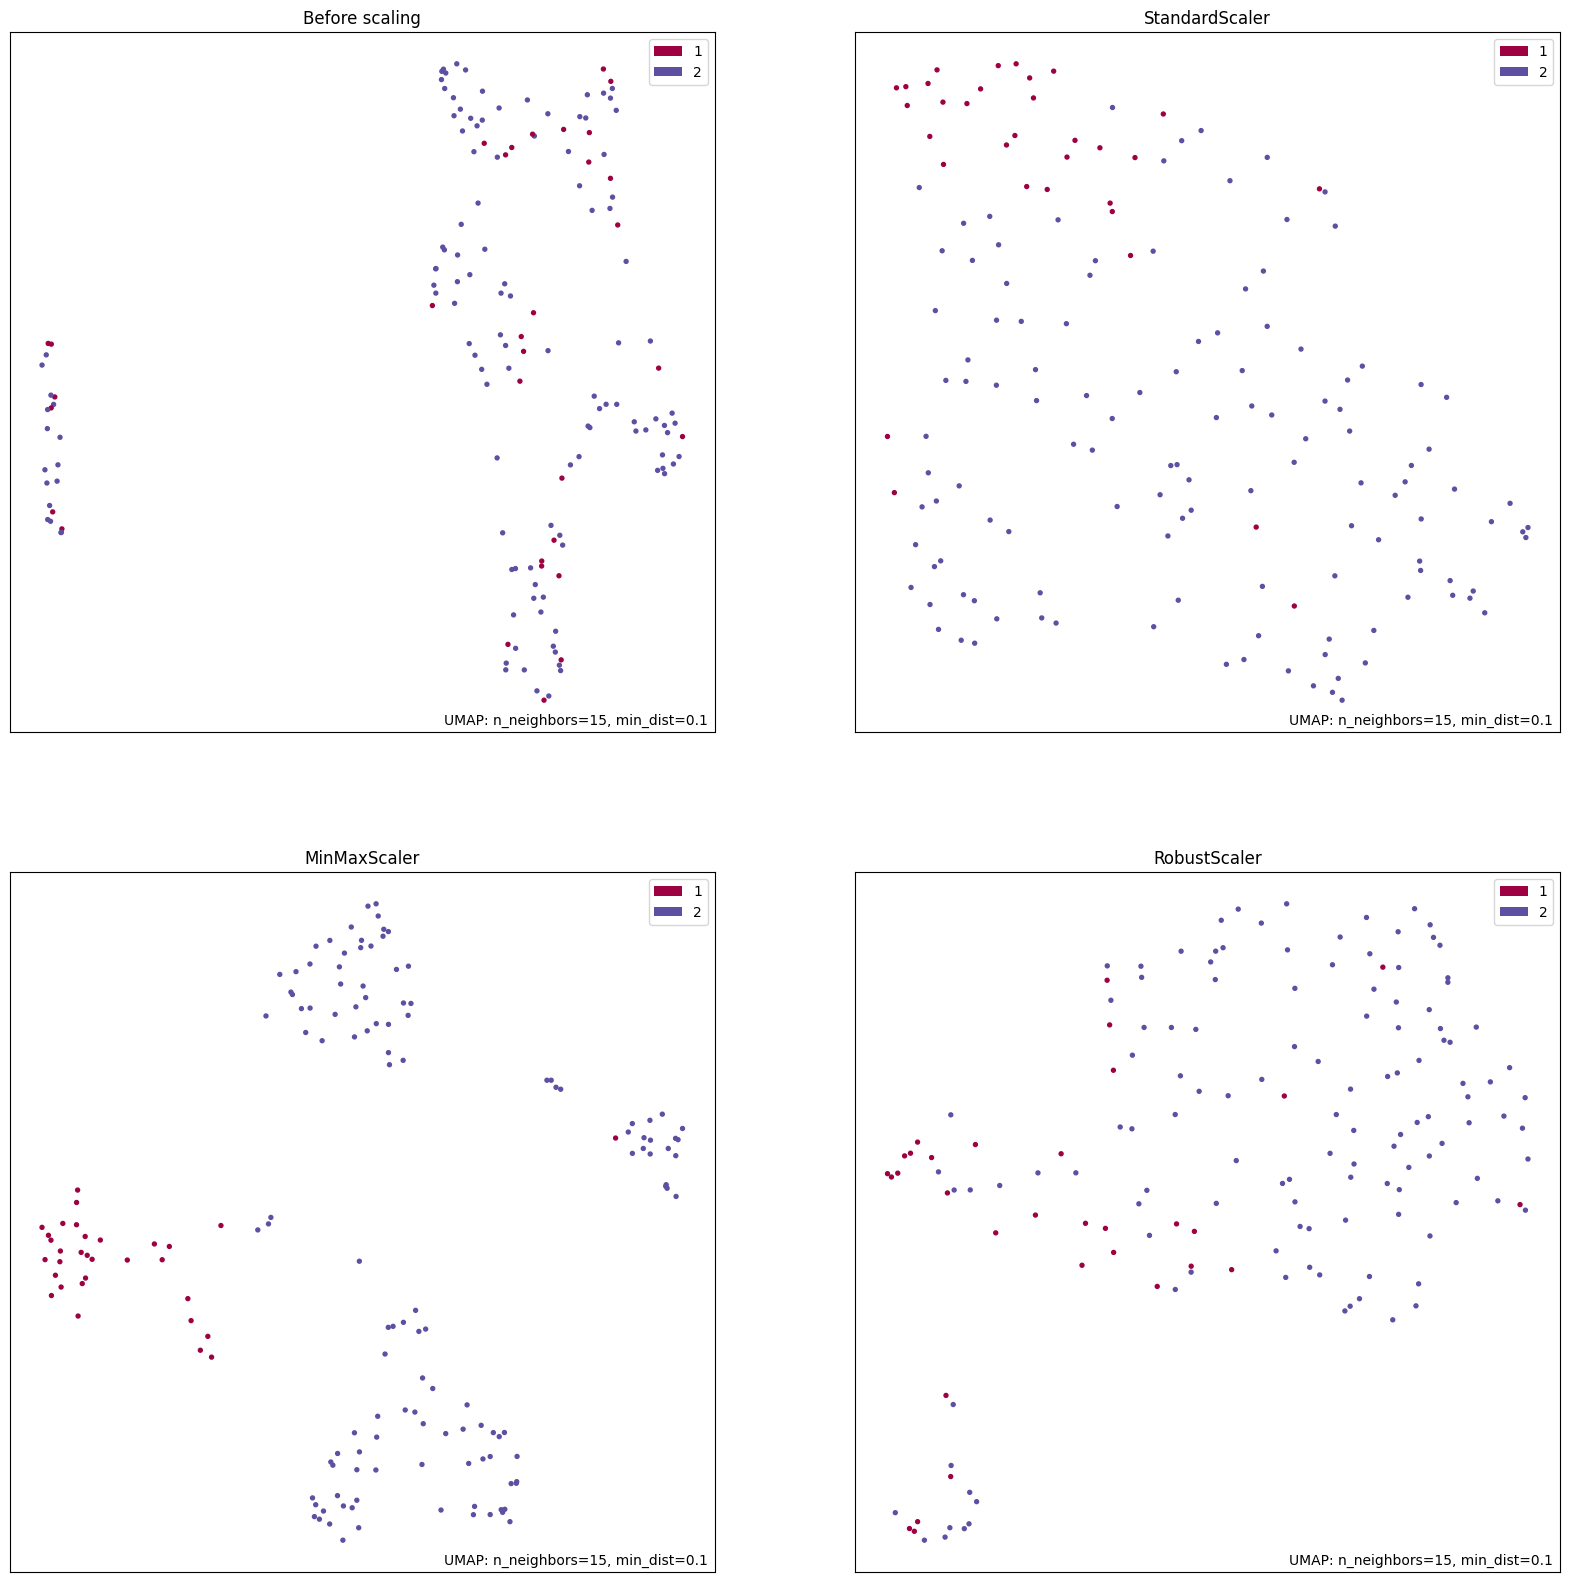

In [25]:
fig, ax = umap.plot.plt.subplots(2, 2, figsize=(20,20))

UMAP1 = umap.UMAP().fit(d)
UMAP2 = umap.UMAP().fit(d1)

UMAP3 = umap.UMAP().fit(d2)
UMAP4 = umap.UMAP().fit(d3)

umap.plot.points(UMAP1, labels=y, ax=ax[0,0])
umap.plot.points(UMAP2, labels=y, ax=ax[0,1])
umap.plot.points(UMAP3, labels=y, ax=ax[1,0])
umap.plot.points(UMAP4, labels=y, ax=ax[1,1])

ax[0,0].set_title('Before scaling')
ax[0,1].set_title('StandardScaler')
ax[1,0].set_title('MinMaxScaler')
ax[1,1].set_title('RobustScaler')